本脚本是开发旋转目标检测时，用于验证旋转目标与四个点关系

主要包括以下功能：
1. 移动旋转目标框的一个点时，如何计算两个相邻点，使得保持矩形形状
2. 绕中心旋转目标框时，四个点如何计算
3. 已知两个点+鼠标位置，计算这个旋转矩形的四个点

In [1]:
# read code tools
# share in https://gist.github.com/WuShaogui/19c690bde2a0fe70b061d50e20129531
import sys
import os.path as osp
sys.path.append('/home/wushaogui/ReadCode/')
from my_read_code_tools import *

# 移动某个点，计算另外两个动点

[[[200 200]]

 [[468 354]]

 [[500 300]]

 [[231 145]]]
[[[200 200]]

 [[393 311]]

 [[400 300]]

 [[206 188]]]


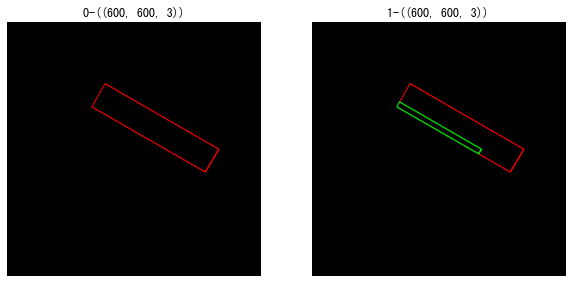

In [2]:
from math import tan,pi
import numpy as np
import cv2

# 根据对角点以及角度，计算剩余的2个点
def calculate_remaining_vertices_of_rotated_rectangle(A, B, rotation_angle):

    if rotation_angle==0 or rotation_angle==90:
        x1,y1=A[0],B[1]
        x2,y2=B[0],A[1]
    else:
        q = rotation_angle*pi/180  # 另一边与x轴的角度
        p = pi/2-q  # 旋转角度

        # 计算剩下的两个点
        x1=(tan(p)*B[0]+tan(q)*A[0]+B[1]-A[1])/((tan(p)+tan(q)))
        y1=B[1]+tan(p)*(B[0]-x1)

        x2=(A[1]-B[1]+tan(p)*A[0]+tan(q)*B[0])/(tan(p)+tan(q))
        y2=B[1]+tan(q)*(x2-B[0])

    return (x1,y1),(x2,y2)

def show_rotated_rectangle(img,A, B, rotation_angle,color=(255, 0, 0)):
    remaining_vertices=calculate_remaining_vertices_of_rotated_rectangle(A,B,rotation_angle)
    pts1 = np.array([A,remaining_vertices[0],B,remaining_vertices[1]], np.int32)
    pts1 = pts1.reshape((-1, 1, 2))
    print(pts1)
    cv2.polylines(img, [pts1], isClosed=True, color=color, thickness=2)

    return img


# 初始状态的对角点
A = (200, 200) # (x,y)
B = (500, 300)
rotation_angle = 30  # 30度
image = np.zeros((600, 600, 3), dtype=np.uint8)
image1=show_rotated_rectangle(image.copy(),A, B, rotation_angle)

A = (200, 200)
B = (400, 300)
image2=show_rotated_rectangle(image1.copy(),A, B, rotation_angle,color=(0,255,0))

show_images([image1,image2])

[[[200 200]]

 [[468 354]]

 [[500 300]]

 [[231 145]]]
[[[300 250]]

 [[471 349]]

 [[500 300]]

 [[328 200]]]


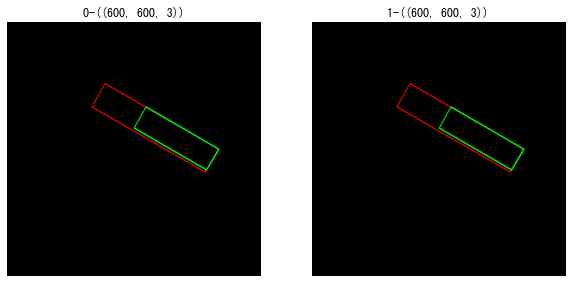

In [3]:
# 初始状态的对角点
A = (200, 200) # (x,y)
B = (500, 300)
rotation_angle = 30  # 30度

image = np.zeros((600, 600, 3), dtype=np.uint8)
image1=show_rotated_rectangle(image,A, B, rotation_angle)

A = (300, 250)
B = (500, 300)
image2=show_rotated_rectangle(image1,A, B, rotation_angle,color=(0,255,0))

show_images([image1,image2])

[[[200 200]]

 [[381  95]]

 [[500 300]]

 [[318 404]]]
[[[300 250]]

 [[428 175]]

 [[500 300]]

 [[371 374]]]


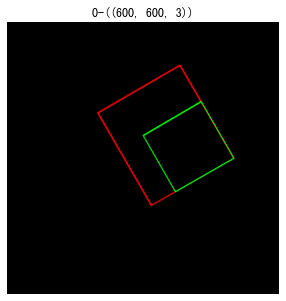

In [4]:
# 初始状态的对角点
A = (200, 200) # (x,y)
B = (500, 300)
rotation_angle = -30  # 30度

image = np.zeros((600, 600, 3), dtype=np.uint8)
image1=show_rotated_rectangle(image,A, B, rotation_angle)

A = (300, 250)
B = (500, 300)
image2=show_rotated_rectangle(image1,A, B, rotation_angle,color=(0,255,0))

show_images([image2])

[[[200 200]]

 [[318 404]]

 [[500 300]]

 [[381  95]]]
[[[300 250]]

 [[371 374]]

 [[500 300]]

 [[428 175]]]


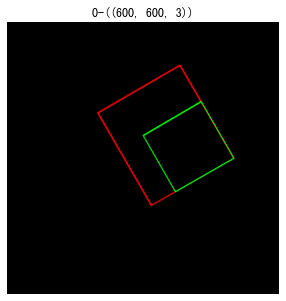

In [5]:
# 初始状态的对角点
A = (200, 200) # (x,y)
B = (500, 300)
rotation_angle = 60  # 30度

image = np.zeros((600, 600, 3), dtype=np.uint8)
image1=show_rotated_rectangle(image,A, B, rotation_angle)

A = (300, 250)
B = (500, 300)
image2=show_rotated_rectangle(image1,A, B, rotation_angle,color=(0,255,0))

show_images([image2])

[[[200 200]]

 [[201 305]]

 [[500 300]]

 [[498 194]]]
[[[300 250]]

 [[300 303]]

 [[500 300]]

 [[499 246]]]


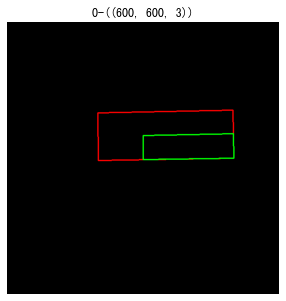

In [6]:
# 初始状态的对角点
A = (200, 200) # (x,y)
B = (500, 300)
rotation_angle = 89  # 30度

image = np.zeros((600, 600, 3), dtype=np.uint8)
image1=show_rotated_rectangle(image,A, B, rotation_angle)

A = (300, 250)
B = (500, 300)
image2=show_rotated_rectangle(image1,A, B, rotation_angle,color=(0,255,0))

show_images([image2])

[[[150 200]]

 [[350 400]]

 [[300 450]]

 [[ 99 250]]]


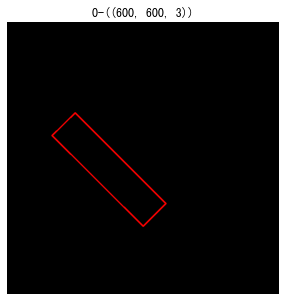

In [7]:
# 初始状态的对角点
A = (150, 200) # (x,y)
B = (300, 450)
rotation_angle = 45  # 30度

image = np.zeros((600, 600, 3), dtype=np.uint8)
image=show_rotated_rectangle(image,A, B, rotation_angle)

show_images([image])

In [8]:
def sort_vertices(allvertices):
    sorted_points = sorted(allvertices, key=lambda point: (point[0], point[1]))
    print(sorted_points)


allvertices=[
        [100,100],
        [100,200]
]
sort_vertices(allvertices)

[[100, 100], [100, 200]]


In [9]:
allvertices=[
        [100,100],
        [100,200],
        [200,100],
        [200,200]
]
sort_vertices(allvertices)

[[100, 100], [100, 200], [200, 100], [200, 200]]


In [10]:
allvertices=[
        [100,100],
        [110,200]
]
sort_vertices(allvertices)

[[100, 100], [110, 200]]


In [11]:
allvertices=[
        [300,100],
        [100,200]
]
sort_vertices(allvertices)

[[100, 200], [300, 100]]


In [12]:
allvertices=[
        [300,100],
        [100,200],
        [400,150]
]
sort_vertices(allvertices)

[[100, 200], [300, 100], [400, 150]]


In [13]:
allvertices=[
        [300,100],
        [100,200],
        [400,150],
        [300,300]
]
sort_vertices(allvertices)

[[100, 200], [300, 100], [300, 300], [400, 150]]


# 旋转矩形，计算4个点

In [14]:
import math


def get_center(points):
    """计算几何中心"""
    x_sum = 0
    y_sum = 0
    for point in points:
        x_sum += point[0]
        y_sum += point[1]
    return x_sum / len(points), y_sum / len(points)

def sort_points(points):
    """按顺时针排序点"""
    # 计算几何中心
    center=get_center(points)

    # 计算每个点与几何中心的角度值
    angles = []
    for point in points:
        dx = point[0] - center[0]
        dy = point[1] - center[1]
        angle = math.atan2(dy, dx)
        angles.append(angle)
    # 根据角度值进行排序
    sorted_points = [point for _, point in sorted(zip(angles, points))]
    return sorted_points

def rotate_point(x, y, theta):
    """旋转一个点"""
    cos_theta = math.cos(math.radians(theta))
    sin_theta = math.sin(math.radians(theta))
    x_prime = x * cos_theta - y * sin_theta
    y_prime = x * sin_theta + y * cos_theta
    return x_prime, y_prime

def get_rectangle_points(center_x, center_y, width, height, angle):
    """获取矩形四个点的坐标"""
    # 计算未旋转前矩形四个点的坐标
    half_width = width / 2
    half_height = height / 2
    points = [
        (center_x - half_width, center_y + half_height),
        (center_x + half_width, center_y + half_height),
        (center_x - half_width, center_y - half_height),
        (center_x + half_width, center_y - half_height)
    ]
    # 对每个点进行旋转变换
    rotated_points = []
    for point in points:
        x, y = point
        x_prime, y_prime = rotate_point(x - center_x, y - center_y, angle)
        rotated_points.append((x_prime + center_x, y_prime + center_y))
    return rotated_points

def draw_rec(img,points,color):
    pts1 = np.array(sort_points(points), np.int32)
    pts1 = pts1.reshape((-1, 1, 2))
    cv2.polylines(img, [pts1], isClosed=True, color=color, thickness=2)
    return img

[[200 275]
 [400 275]
 [400 325]
 [200 325]]
------------------------------
[[200 271]
 [225 228]
 [399 328]
 [374 371]]
------------------------------
[[275 200]
 [325 200]
 [325 400]
 [275 400]]
------------------------------
[[328 200]
 [371 225]
 [271 399]
 [228 374]]
------------------------------
[[385 242]
 [402 289]
 [214 357]
 [197 310]]
------------------------------


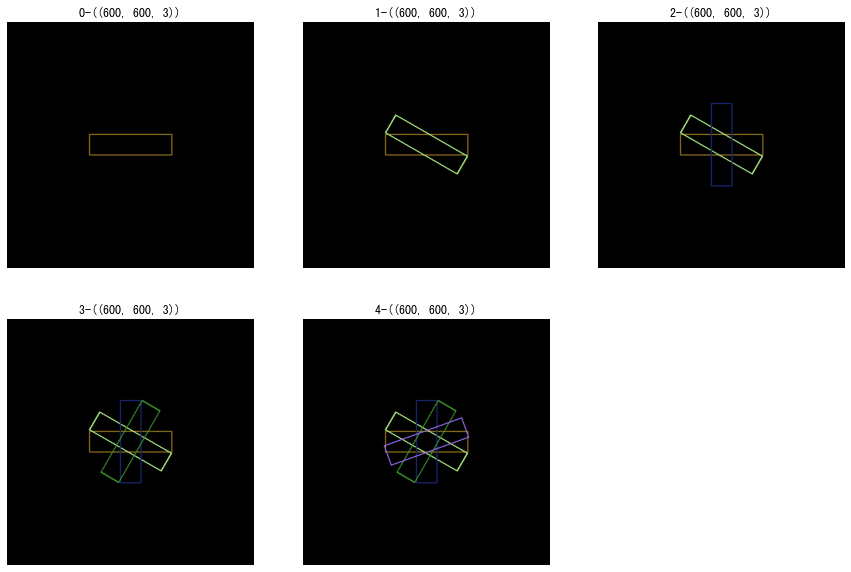

In [15]:
import cv2
import numpy as np
import random

# 示例用法
center_x = 300
center_y = 300
width = 200
height = 50
# angle = 0

img = np.zeros((600, 600, 3), dtype=np.uint8)
allimg=[img]
colors=[(random.randint(0,255),random.randint(0,255),random.randint(0,255)) for i in range(100)]
for i,angle in enumerate([0,30,90,120,160]):
    points = get_rectangle_points(center_x, center_y, width, height, angle)
    print(np.int0(sort_points(points)))

    img1=draw_rec(allimg[-1].copy(),points,colors[i])
    allimg.append(img1)
    print('------'*5)

show_images(allimg[1:])

# 已知两个点+鼠标位置，计算这个旋转矩形的四个点

In [16]:
def perpendicular_line(A, B):
    # 计算向量AB的垂直向量
    if A[0] == B[0]:
        vertical_vector = [1, 0]
    else:
        vertical_vector = [-(B[1] - A[1]) / (B[0] - A[0]), 1]

    return vertical_vector

def projection_point_on_perpendicular_line(A, B, C):
    # 计算垂直向量
    vertical_vector = perpendicular_line(A, B)

    # 计算向量AC
    AC = [C[0] - A[0], C[1] - A[1]]

    # 计算投影点的比例系数
    ratio = (vertical_vector[0] * AC[0] + vertical_vector[1] * AC[1]) / (vertical_vector[0] ** 2 + vertical_vector[1] ** 2)

    # 计算投影点的坐标
    projection_x = A[0] + vertical_vector[0] * ratio
    projection_y = A[1] + vertical_vector[1] * ratio

    return [projection_x, projection_y]

def find_fourth_point(A, B, C):
    # 计算向量AB和向量BC
    AB = [B[0] - A[0], B[1] - A[1]]
    BC = [C[0] - B[0], C[1] - B[1]]

    # 计算向量AB和向量BC的夹角
    angle = math.atan2(AB[1], AB[0]) - math.atan2(BC[1], BC[0])

    # 计算第四个点的坐标
    D = [B[0] + BC[0] * math.cos(angle) - BC[1] * math.sin(angle), B[1] + BC[0] * math.sin(angle) + BC[1] * math.cos(angle)]

    return D

[106.33627799874398, 362.99920452166634]


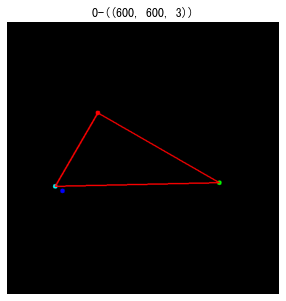

In [17]:
import cv2
import random

img = np.zeros((600, 600, 3), dtype=np.uint8)

A = [200, 200]
B = [468, 354]
C = [random.randint(100,300), random.randint(100,500)]

new_C = projection_point_on_perpendicular_line(A, B, C)
print(new_C)

pts1 = np.array([A,B,new_C], np.int32)
pts1 = pts1.reshape((-1, 1, 2))
cv2.circle(img, A, 5, (255,0,0), -1)
cv2.circle(img, B, 5, (0,255,0), -1)
cv2.circle(img, C, 5, (0,0,255), -1)
cv2.circle(img, np.int0(new_C), 5, (0,255,255), -1)
cv2.polylines(img, [pts1], isClosed=True, color=(255,0,0), thickness=2)
show_images([img])


D=find_fourth_point(A,B,new_C)

In [18]:
def projection_point(A, B, C):
    # 计算向量AB和向量AC
    AB = [B[0] - A[0], B[1] - A[1]]
    AC = [C[0] - A[0], C[1] - A[1]]

    # 计算向量AB的模长平方
    length_squared = AB[0] ** 2 + AB[1] ** 2

    # 计算向量AB与向量AC的点积
    dot_product = AB[0] * AC[0] + AB[1] * AC[1]

    # 计算投影点的比例系数
    ratio = dot_product / length_squared

    # 计算投影点的坐标
    projection_x = A[0] + AB[0] * ratio
    projection_y = A[1] + AB[1] * ratio

    return [projection_x, projection_y]

# 已知定点A、B及动点C，求出这三点组合成的旋转矩形
def cal_rect(A:tuple,B:tuple,C:tuple):
    D=(C[0]-A[0]+B[0],C[1]-A[1]+B[1])
    return D      

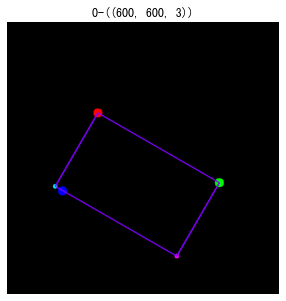

In [19]:
img = np.zeros((600, 600, 3), dtype=np.uint8)
cv2.circle(img, A, 10, (255,0,0), -1) # 红色
cv2.circle(img, B, 10, (0,255,0), -1) # 绿色
cv2.circle(img, C, 10, (0,0,255), -1) # 蓝色
cv2.circle(img, np.int0(new_C), 5, (0,255,255), -1)

D=cal_rect(A,B,new_C)
cv2.circle(img, np.int0(D), 5, (255,0,255), -1)

pts1 = np.array([A,B,D,new_C], np.int32)
pts1 = pts1.reshape((-1, 1, 2))
cv2.polylines(img, [pts1], isClosed=True, color=(128,0,255), thickness=2)
show_images([img])